# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
#carregando os pacotes 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset

%matplotlib inline

In [2]:
# carregando a base de gorjetas

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip']/(tips['total_bill'] + tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014,20.98


In [3]:
# matriz de design através do Patsy

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1',tips)

X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
# matriz y

y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
# análise de quais variáveis são relevantes (para P>\t\ menor de 0,5)

modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.64e-20
Time:                        22:33:14   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# as variáveis irrelevantes são aquelas com P>|t| maiores de 0,5, ou seja, são irrelevantes as variáveis:
# sexo e o time (Dinner), razão pela qual serão removidos


reg = smf.ols('tip ~ smoker + net_bill', data = tips).fit()

In [7]:
tips['resid'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           4.56e-22
Time:                        22:33:18   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

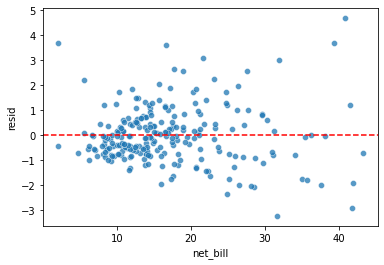

In [8]:
# gráfico de residuo em função do net_bill

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

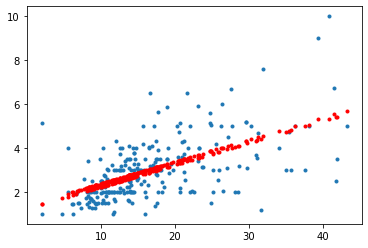

In [9]:
# análise dos valores preditos

tips['pred_tip'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_tip'], 'r.')

In [10]:
# testando o modelo com transformação da variável net_bill em log

reg = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()
tips['resid_log'] = reg.resid

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           5.38e-19
Time:                        22:33:23   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# note-se que a variável smoker tornou-se irrelevante na transformação do modelo para log de net_bill
# assim sendo, vamos removê-lo.

reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
tips['resid_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           4.40e-20
Time:                        22:33:24   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

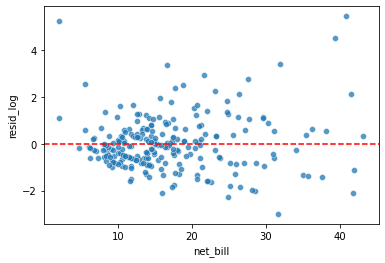

In [12]:
sns.scatterplot(x = 'net_bill', y = 'resid_log', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

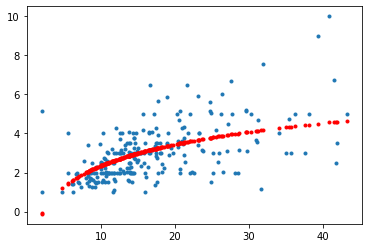

In [13]:
# análise dos valores preditos

tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

In [14]:
# testando o modelo com transformação da variável net_bill em um polinômio

reg = smf.ols('tip ~ smoker + np.power(net_bill,2)', data = tips).fit()
tips['resid_polinômio'] = reg.resid

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           1.04e-19
Time:                        22:33:33   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

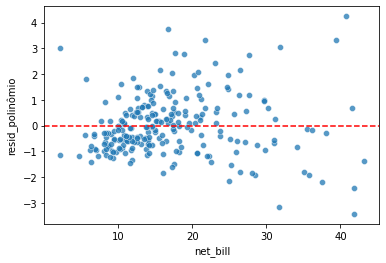

In [15]:
sns.scatterplot(x = 'net_bill', y = 'resid_polinômio', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

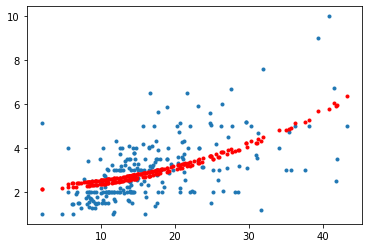

In [16]:
# análise dos valores preditos

tips['pred_poli'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_poli'], 'r.')

Escolho o modelo polinômio da variável net_bill, em razão do r.quadrado ser maior que o dos demais e haver maior número de variáveis (smoker e net_bill) relevantes em relação aos demais. 

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
y, X =  patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 0',tips)

X

DesignMatrix with shape (244, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
          1            0             1               1     20.58
          1            0             1               1      6.77
          1            0             1               1     23.76
          1            0             1               1     13.08
          1            0             1               1     11.55
          1            0             1               1      8.56
          0            1             1               1     30.26
          1            0             1               1     13.85
          1            0             1               1   

In [18]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [19]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           1.21e-18
Time:                        22:33:50   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sex[Male]          0.4504      0.078      5.801      0.000       0.297       0.603
sex[Female]        0.4552      0.074      6.192      0.000       0.310       0.600
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# só a variável "time" é considerada irrelevante, razão para ser excluída.

reg = smf.ols('np.log(tip) ~ sex + smoker + net_bill', data = tips).fit()

tips['resid'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     36.43
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           1.95e-19
Time:                        22:33:52   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             203.0
Df Residuals:                     240   BIC:                             217.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4631      0.069      6.730      0.000       0.328       0.599
sex[T.Female]     0.0016      0.049      0.032      0.975      -0.095       0.098
smoker[T.No]      0.0429      0.048      0.891      0.374      -0.052       0.138
net_bill          0.0305      0.003     10.347      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.981
Skew:                          -0.169   Prob(JB):                        0.371
Kurtosis:                       3.285   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# a variável "sexo" tornou irrelevante ao remover a variável "time". Então, també removeremos a variável "sexo".


reg = smf.ols('np.log(tip) ~ smoker + net_bill', data = tips).fit()

tips['resid'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-20
Time:                        22:34:14   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

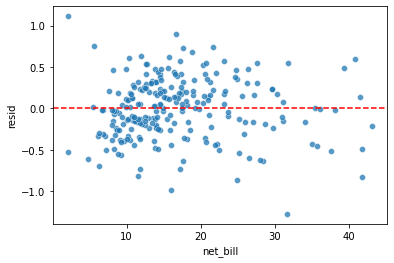

In [22]:
# gráfico de residuo em função do net_bill

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

In [23]:
# testando o modelo com transformação da variável net_bill em log

reg = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data = tips).fit()
tips['resid_log'] = reg.resid

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           7.20e-21
Time:                        22:34:17   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# removendo a variável smoker por ser irrelevante neste modelo de transformação

reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
tips['resid_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           5.62e-22
Time:                        22:34:18   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

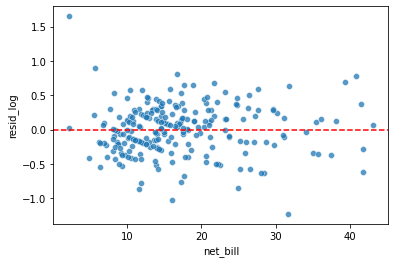

In [25]:
sns.scatterplot(x = 'net_bill', y = 'resid_log', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

In [26]:
# testando o modelo com transformação da variável net_bill em um polinômio

reg = smf.ols('np.log(tip) ~ smoker + np.power(net_bill,2)', data = tips).fit()
tips['resid_polinômio'] = reg.resid

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           5.45e-16
Time:                        22:34:20   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

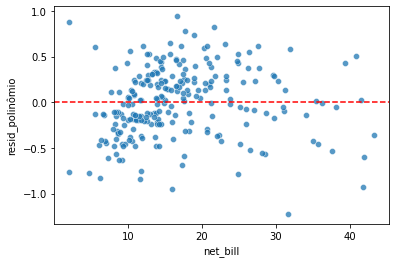

In [27]:
sns.scatterplot(x = 'net_bill', y = 'resid_polinômio', data = tips, alpha = .75)
plt.axhline( y=0, color = 'r', linestyle = '--')

Novamente como melhor modelo foi escolhido o último que é o polinômio de net_bill, tendo o y como sento log do tip

In [28]:
# cálculo o R² deste modo, sem o log no tip

tips['resid_polinômio_pred'] = np.exp(reg.fittedvalues)
tips[['resid_polinômio_pred', 'resid_polinômio']].corr().iloc[0,1]**2

0.0013610287089389772

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [119]:
df_prevrenda = pd.read_csv('01.1 - Profissao- Cientista de Dados_M10_support material.csv')
df_prevrenda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [120]:
df_prevrenda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [123]:
df_prevrenda.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [127]:
df = df_prevrenda.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  re

In [128]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + 0',df)

X

DesignMatrix with shape (12466, 1)
  tempo_emprego
        3.57534
        0.86027
        8.06575
        1.20822
       13.87397
       15.56164
        5.04658
        1.59178
        3.43014
        7.21918
        5.63836
        4.47945
       16.52877
        7.93425
        5.54247
        5.35890
        6.93425
        4.00822
       10.63562
        2.68219
       14.95890
        1.52055
        1.76164
        2.43288
        3.48767
       19.96712
        7.17808
        0.34795
        9.55342
       18.38904
  [12436 rows omitted]
  Terms:
    'tempo_emprego' (column 0)
  (to view full data, use np.asarray(this_obj))

In [129]:
y

DesignMatrix with shape (12466, 1)
     renda
   3369.24
   6096.14
   5658.98
   7246.69
   4017.37
   5483.58
   1947.99
   7781.51
   5577.82
    803.34
   3109.79
   2779.67
   4640.47
   1055.14
   1728.33
   1934.80
   3939.28
   4787.86
   1772.14
   2053.45
  44277.19
  24664.37
   6165.13
   3104.42
    630.30
   3819.53
   2156.77
   1105.60
   6505.75
   7212.40
  [12436 rows omitted]
  Terms:
    'renda' (column 0)
  (to view full data, use np.asarray(this_obj))

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:33:09   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

/tmp/ipykernel_4443/3182386994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid'] = reg.resid


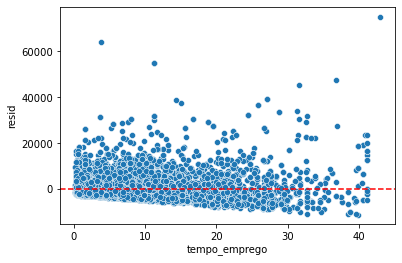

In [130]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
df['resid'] = reg.resid

print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = df)
plt.axhline(y=0, color='r', linestyle='--')

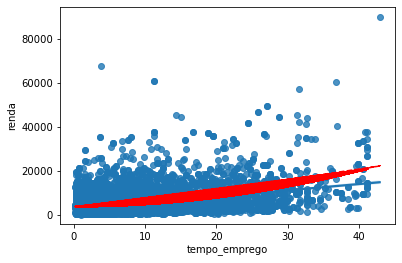

In [132]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:35:34   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/tmp/ipykernel_4443/670626337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_poli'] = reg.resid


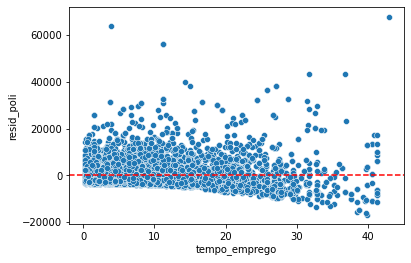

In [133]:
reg = smf.ols('renda ~ np.power(tempo_emprego,2)', data = df).fit()
df['resid_poli'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'resid_poli', data = df)
plt.axhline(y=0, color='r', linestyle='--')


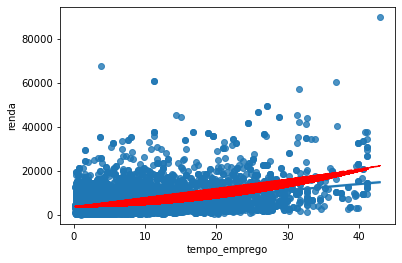

In [134]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], reg.fittedvalues, 'r,--')

/tmp/ipykernel_4443/2509334281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = reg.fittedvalues


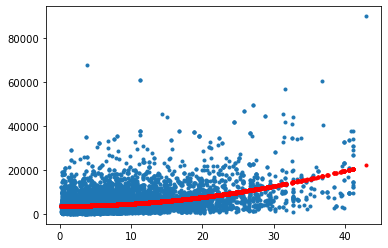

In [135]:
df['pred'] = reg.fittedvalues

plt.plot(df['tempo_emprego'], df['renda'], '.')
plt.plot(df['tempo_emprego'], df['pred'], 'r.')


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.921
Model:                            OLS   Adj. R-squared:                 -0.921
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                nan
Time:                        00:39:22   Log-Likelihood:            -1.2761e+05
No. Observations:               12466   AIC:                         2.552e+05
Df Residuals:                   12465   BIC:                         2.552e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.095e-

/tmp/ipykernel_4443/1493053019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_exp'] = reg.resid


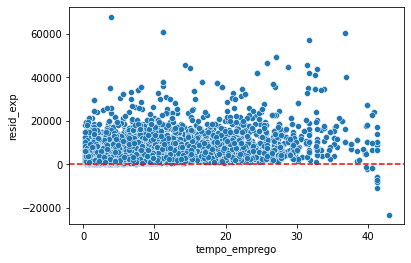

In [136]:
reg = smf.ols('renda ~ np.exp(tempo_emprego)', data = df).fit()
df['resid_exp'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'resid_exp', data = df)
plt.axhline(y=0, color='r', linestyle='--')


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          7.66e-236
Time:                        00:39:57   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.16

/tmp/ipykernel_4443/3391649996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_log'] = reg.resid


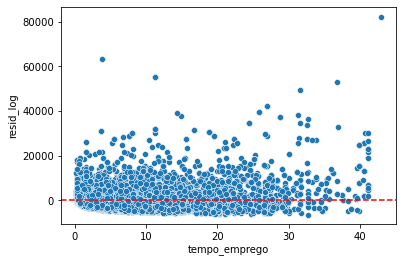

In [137]:
reg = smf.ols('renda ~ np.log(tempo_emprego)', data = df).fit()
df['resid_log'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'resid_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')


Para melhorar esta regressão (y = renda e x= tempo_emprego), com R-Quadrado igual a 0.155, transformaria o x em polinômio de 2º Grau, pois o R-Quadrado ficaria igual a 0.166.

In [139]:
# regressão linear ,multipla

reg = smf.ols(
'renda ~ qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + posse_de_veiculo + posse_de_imovel',
data = df).fit()

df['resid'] = reg.resid

print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     406.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:04   Log-Likelihood:            -1.2243e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12459   BIC:                         2.449e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/tmp/ipykernel_4443/803594073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid'] = reg.resid


In [140]:
# removendo da variável qtd_filhos por ser irrelevante (P>\t\ maior que 0.5)

reg = smf.ols(
'renda ~ idade + tempo_emprego + qt_pessoas_residencia + posse_de_veiculo + posse_de_imovel',
data = df).fit()

df['resid'] = reg.resid

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     488.0
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:25   Log-Likelihood:            -1.2243e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12460   BIC:                         2.449e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/tmp/ipykernel_4443/1522730090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid'] = reg.resid


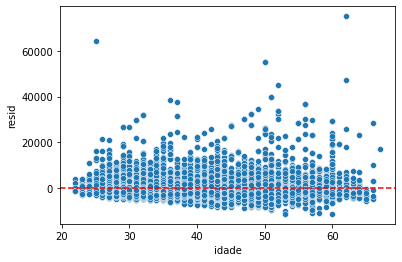

In [141]:
sns.scatterplot(x = 'idade', y = 'resid', data = df)
plt.axhline(y=0, color='r', linestyle='--')


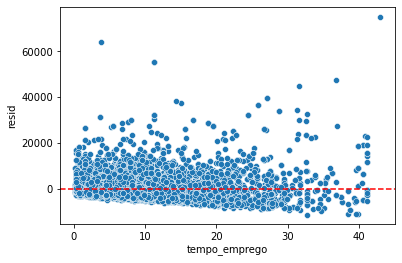

In [142]:
sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = df)
plt.axhline(y=0, color='r', linestyle='--')


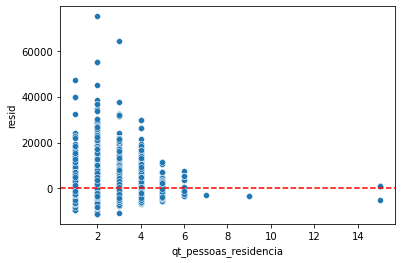

In [143]:
sns.scatterplot(x = 'qt_pessoas_residencia', y = 'resid', data = df)
plt.axhline(y=0, color='r', linestyle='--')


<AxesSubplot:xlabel='posse_de_veiculo', ylabel='resid'>

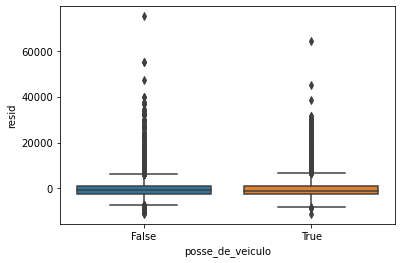

In [144]:
sns.boxplot(x = 'posse_de_veiculo', y = 'resid', data = df)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='resid'>

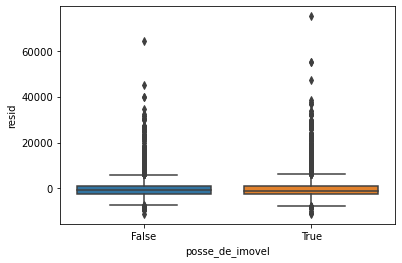

In [145]:
sns.boxplot(x = 'posse_de_imovel', y = 'resid', data = df)

Verifica-se nos gráficos de resíduos que não há disparidade que justifique a realização de ajustes. Ademais o R-Quadrado deste modelo (0.164) é muito próximo do R-Quadrado do modelo do "x = tempo_empreso" transformado em polinômio de 2º Grau anteriormente (0.166). Contudo apresenta maiores números de variáveis, o que indica ser o melhor modelo a ser preditado.

/tmp/ipykernel_4443/3739726353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = reg.fittedvalues


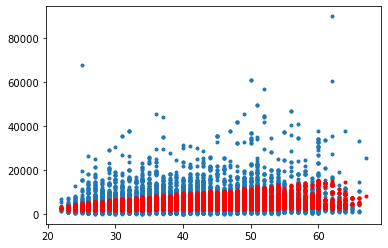

In [146]:
df['pred'] = reg.fittedvalues

plt.plot(df['idade'], df['renda'], '.')
plt.plot(df['idade'], df['pred'], 'r.')


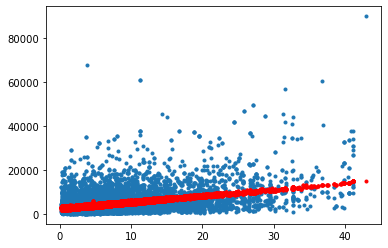

In [147]:
plt.plot(df['tempo_emprego'], df['renda'], '.')
plt.plot(df['tempo_emprego'], df['pred'], 'r.')
